In [23]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# read csv file
pokemon_data = pd.read_csv("Pokemon.csv")

In [25]:
#print top 5 enties
pokemon_data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [26]:
#drop duplicate id column
pokemon_data = pokemon_data.drop("#", axis = 1)

In [27]:
pokemon_data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [28]:
#check for null values
pokemon_data.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [29]:
#fill null values
pokemon_data["Type 2"].fillna(pokemon_data["Type 1"], inplace = True)

In [30]:
#pokemon_data.isnull().sum()
pokemon_data.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

## Let's see how attacking power of pokemon is distributed across all Generations !!

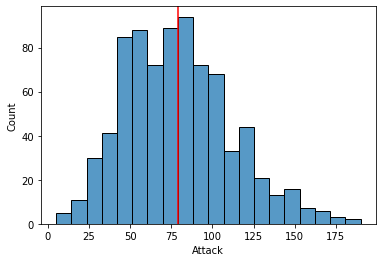

In [34]:
#We will make use of histplot to see distribution
sns.histplot(pokemon_data["Attack"])
plt.axvline(pokemon_data["Attack"].mean(), color = "red")

C:\Users\Krittika Chaturvedi\.conda\envs\py37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

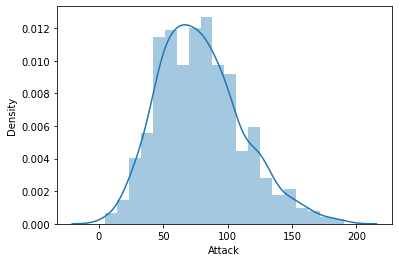

In [35]:
#plot distplot
sns.distplot(pokemon_data["Attack"])

Above histogram shows distribution of attack for Pokemon with average value lying between 75 to 77.

## Finding Correlation between the attributes

<AxesSubplot:>

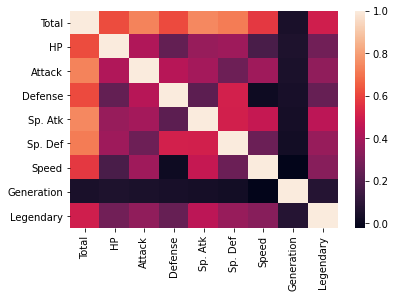

In [38]:
## plot heatmap of correlations
pokemon_data.corr()
sns.heatmap(pokemon_data.corr(), annot = False)

From above heatmap we can see that there is not much correlation between attributes of pokemon dataset. The highest correlation is betwwen Total Stregth and Sp.Attk attribute that is of 0.75 .

## Fire V/S Water Pokemon attacking and defense power

In [41]:
#first we need to separate data for fire and water pokemon
fire = pokemon_data[(pokemon_data["Type 1"] == "Fire" ) | (pokemon_data["Type 2"] == "Fire")]
water = pokemon_data[(pokemon_data["Type 1"] == "Water") | (pokemon_data["Type 2"] == "Water")]

In [42]:
#fire shape
fire.shape

(64, 12)

In [43]:
#water shape
water.shape

(126, 12)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

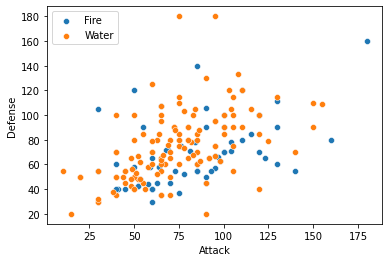

In [45]:
#plotting scatter plot for fire and water type pokemon comparing attack and defense
sns.scatterplot( x = "Attack", y ="Defense", data = fire, label = "Fire")
sns.scatterplot( x = "Attack", y = "Defense", data = water, label = "Water")

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

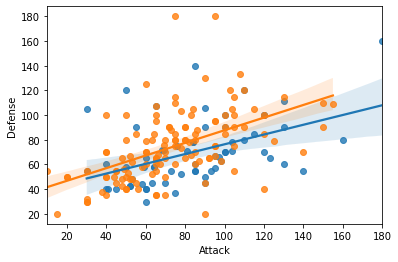

In [46]:
#plotting regression plot for the same
sns.regplot( x = "Attack", y ="Defense", data = fire, label = "Fire")
sns.regplot( x = "Attack", y = "Defense", data = water, label = "Water")

We can draw 2 conclusions from above plot :<br>
(1) On plottting regplot we found out that for both fire and water type attack and defense power is positively related but for water type for some same particular value of attack power it has better defense power than fire type.<br>
(2)We can also infer that fire type has better attack power that water type but water type has better defense power than fire type

## Swarmplot - Generation V/S Speed

<AxesSubplot:xlabel='Generation', ylabel='Speed'>

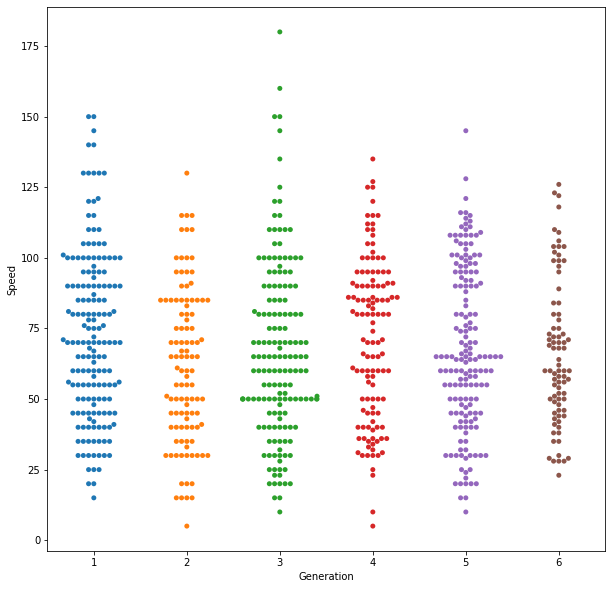

In [48]:
#Plotting Swarm plot
plt.figure(figsize = (10,10))
sns.swarmplot(x ="Generation", y="Speed", data =pokemon_data)

## Do pokemon is legendary or not affects its total strength ?

[Text(0, 0, 'False'), Text(1, 0, 'True')]

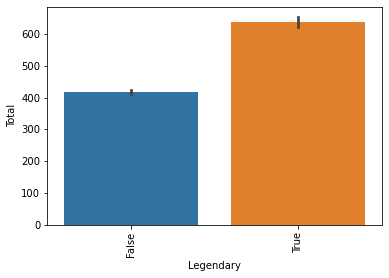

In [53]:
#plot barplot with x axis as Pokemon name and y axis as total strength
a = sns.barplot( x = "Legendary", y ="Total", data = pokemon_data)
a.set_xticklabels(a.get_xticklabels(), rotation = 90)

We observe that mean total strength for Legendary value True is greater than value for Legendary value False

## Number of Pokemons by each type and Generation

In [55]:
#transforming dataset
a = pokemon_data.groupby(["Generation","Type 1"]).count().reset_index()
a

,Generation,Type 1,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bug,14,14,14,14,14,14,14,14,14,14
1,1,Dragon,3,3,3,3,3,3,3,3,3,3
2,1,Electric,9,9,9,9,9,9,9,9,9,9
3,1,Fairy,2,2,2,2,2,2,2,2,2,2
4,1,Fighting,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
93,6,Poison,2,2,2,2,2,2,2,2,2,2
94,6,Psychic,5,5,5,5,5,5,5,5,5,5
95,6,Rock,9,9,9,9,9,9,9,9,9,9
96,6,Steel,5,5,5,5,5,5,5,5,5,5


In [56]:
a = a[["Generation", "Type 1", "Total"]]
a

,Generation,Type 1,Total
0,1,Bug,14
1,1,Dragon,3
2,1,Electric,9
3,1,Fairy,2
4,1,Fighting,7
...,...,...,...
93,6,Poison,2
94,6,Psychic,5
95,6,Rock,9
96,6,Steel,5


In [58]:
a = a.pivot("Generation", "Type 1", "Total")
a

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Generation,,,,,,,,,,,,,,,,,,
1,14.0,NaN,3.0,9.0,2.0,7.0,14.0,NaN,4.0,13.0,8.0,2.0,24.0,14.0,11.0,10.0,NaN,31.0
2,12.0,6.0,NaN,7.0,5.0,2.0,8.0,NaN,1.0,9.0,3.0,4.0,15.0,1.0,7.0,5.0,3.0,18.0
3,12.0,6.0,12.0,5.0,NaN,5.0,8.0,NaN,5.0,13.0,7.0,7.0,18.0,3.0,12.0,8.0,12.0,27.0
4,10.0,3.0,4.0,12.0,1.0,3.0,5.0,NaN,7.0,15.0,4.0,3.0,18.0,6.0,8.0,6.0,3.0,13.0
5,18.0,13.0,9.0,8.0,NaN,7.0,9.0,2.0,5.0,15.0,10.0,6.0,19.0,2.0,14.0,6.0,4.0,18.0
6,3.0,3.0,4.0,3.0,9.0,3.0,8.0,2.0,10.0,5.0,NaN,2.0,4.0,2.0,5.0,9.0,5.0,5.0


<AxesSubplot:xlabel='Generation'>

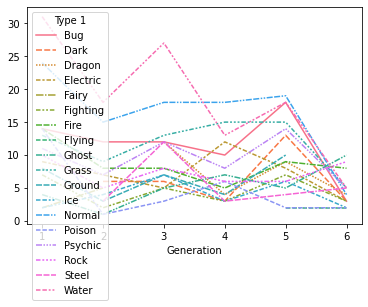

In [59]:
#plotting lineplot
sns.lineplot(data = a)

## Outliers - Boxplot

In [21]:
#boxplot

<AxesSubplot:xlabel='Speed'>

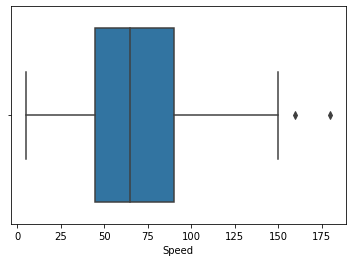

In [60]:
sns.boxplot(x = pokemon_data["Speed"])